---

### Content of the file

**7.2) Trading Strategy and Backtesting:**

   - **Position Determination:** The actual position (whether to buy, hold, or sell) is determined purely by the Best LSTM model's signal.
     - **Initial Capital:** We set an initial capital of 100,000 for backtesting the strategy.
     - **Stop-Loss and Take-Profit Mechanism:**
         - **Stop-Loss:** A stop-loss is triggered if the portfolio value decreases by 0.5% (0.005), which closes the position to prevent further losses.
          - **Take-Profit:** A take-profit is triggered if the portfolio value increases by 3% (0.03), locking in the gains by closing the position.
    - **Portfolio Value Update:** The portfolio value is updated after each trading day based on whether a stop-loss, take-profit, or normal trading occurred.
    - **Strategy Returns and Cumulative Returns:**
           - Strategy Returns: Calculated as the percentage change in portfolio value from one day to the next.
           - Cumulative Strategy Returns: The cumulative return of the strategy is calculated by multiplying the returns over time.
           

**QuantStats Backtesting Tearsheet:**
   - The final portfolio value and cumulative returns are compared with the benchmark SPY ETF to evaluate the model's effectiveness. 
   - The strategy is further analyzed using QuantStats Tearsheet, which provides a detailed performance report including all important metrics, such as Return, Sharpe ratio, drawdown, and others, over the entire test period.
 
**This comprehensive evaluation helps in understanding how well the LSTM model can predict SPY ETF trends and whether the trading strategy based on these predictions can yield profitable results.**


---

### Importing Required Libraries

In [1]:
# Data manipulation and analysis
import pandas as pd

#Numerical Operations
import numpy as np

# Analyzing trading strategy's performance
import quantstats as qs

# Fetch Financial Data
from alpha_vantage.timeseries import TimeSeries

# Ignore warnings 
import warnings
warnings.filterwarnings("ignore")

---

#### Loading the CSV File with LSTM Model Signals
- The first step in setting up your trading strategy is to load the CSV file that contains the signals generated by your best LSTM model. This file includes predictions that indicate whether to buy (signal = 1) or sell (signal = 0) on each trading day within the test period.

In [2]:
LSTM_Signal_df = pd.read_csv("LSTM_Model_Signal_Test_Data.csv")

#### Setting Up the DataFrame for Trading Strategy

In [3]:
LSTM_Signal_df.set_index('date', inplace=True)

# Remove the 'Unnamed' column
LSTM_Signal_df = LSTM_Signal_df.drop(columns=['Unnamed: 0'])


LSTM_Signal_df

,daily_return,yield_spread,VXX_daily_return,UUP_daily_return,volume_tech,ADOSC_3_10,ADX_14,OBV,AOBV_SR_2,BBP_5_2.0,...,PIVOTS_TRAD_D_P,PIVOTS_TRAD_D_R3,PSL_12,PVOL,PVT,SLOPE_1,SMCtp_14_50_20_5,STDEV_30,Target,Signal
date,,,,,,,,,,,,,,,,,,,,,
2023-04-05,-0.002618,-0.49,-0.009178,0.002894,65200243.0,9.755913e+07,13.795051,-1.829899e+07,0.0,0.452621,...,409.276667,418.636667,66.666667,2.657562e+10,-1.296695e+10,-1.07,-1.112537,6.497442,0.0,0
2023-04-06,0.003901,-0.52,-0.017623,0.000722,63743345.0,1.018255e+08,14.138402,4.544436e+07,0.0,0.506886,...,407.393333,413.033333,66.666667,2.608314e+10,-1.294209e+10,1.59,-9.946714,6.806184,1.0,0
2023-04-10,0.001026,-0.59,-0.009660,0.005768,63681042.0,1.137047e+08,14.491270,1.091254e+08,0.0,0.592109,...,408.116000,415.720000,75.000000,2.608439e+10,-1.293555e+10,0.42,-16.918295,7.118465,0.0,0
2023-04-11,0.000269,-0.60,-0.009754,-0.003584,59297945.0,1.027176e+08,15.066452,1.684233e+08,0.0,0.746482,...,408.423333,415.863333,75.000000,2.429555e+10,-1.293396e+10,0.11,-24.431616,7.406816,0.0,0
2023-04-12,-0.004076,-0.54,0.006098,-0.005396,86420379.0,6.847982e+07,15.217157,8.200296e+07,0.0,0.270641,...,409.940000,414.460000,66.666667,3.526384e+10,-1.296918e+10,-1.67,-27.228810,7.578515,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-24,-0.003251,-0.46,-0.007972,-0.003436,45528654.0,3.742017e+07,26.137312,1.641817e+09,1.0,0.108572,...,544.393333,549.653333,58.333333,2.471022e+10,-1.149704e+10,-1.77,-7.034976,7.967939,0.0,0
2024-06-25,0.003851,-0.42,-0.017857,0.001034,38273346.0,3.392215e+07,26.493766,1.680090e+09,1.0,0.414999,...,544.103333,552.763333,66.666667,2.085247e+10,-1.148231e+10,2.09,-10.189487,7.897289,1.0,1
2024-06-26,0.001248,-0.39,-0.010909,0.004823,38550637.0,3.609444e+07,27.023626,1.718641e+09,0.0,0.606793,...,544.156667,549.676667,75.000000,2.102976e+10,-1.147750e+10,0.68,-20.033204,7.778476,0.0,1


### Fetching and Setting SPY ETF as Benchmark

In [4]:
# AlphaVantage premium API key
api_key = '7OVPSPQGG82Z6EJZ'
ts = TimeSeries(key=api_key, output_format='pandas')

# Fetch daily adjusted data for SPY
benchmark_data, meta_data = ts.get_daily_adjusted(symbol='SPY', outputsize='full')

# Ensure the index is datetime and sort it
benchmark_data.index = pd.to_datetime(benchmark_data.index)
benchmark_data.sort_index(inplace=True)

# Define the date range
start_date = '2023-04-04'
end_date = '2024-06-28'

# Filter data for the specified date range
benchmark_data = benchmark_data.loc[start_date:end_date]

# Select the adjusted close column and calculate daily returns
benchmark_data['SPY_ETF_BM_daily_return'] = benchmark_data['5. adjusted close'].pct_change().dropna()

# Drop NA values (if any) from daily returns
benchmark_data.dropna(inplace=True)

benchmark_data

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient,SPY_ETF_BM_daily_return
date,,,,,,,,,
2023-04-05,407.91,408.70,405.880,407.60,400.454000,65200243.0,0.0,1.0,-0.002618
2023-04-06,406.77,409.48,405.678,409.19,402.016124,63743345.0,0.0,1.0,0.003901
2023-04-10,406.61,409.69,405.970,409.61,402.428761,63681042.0,0.0,1.0,0.001026
2023-04-11,410.26,411.18,408.920,409.72,402.536832,59297945.0,0.0,1.0,0.000269
2023-04-12,411.87,412.17,407.440,408.05,400.896111,86420379.0,0.0,1.0,-0.004076
...,...,...,...,...,...,...,...,...,...
2024-06-24,544.33,546.95,542.620,542.74,542.740000,45528654.0,0.0,1.0,-0.003251
2024-06-25,543.99,545.20,542.440,544.83,544.830000,38273346.0,0.0,1.0,0.003851
2024-06-26,543.69,546.24,543.030,545.51,545.510000,38550637.0,0.0,1.0,0.001248


#### SPY ETF is used as Both the Trading Instrument and Benchmark: 
   - In this strategy, the SPY ETF is both the trading instrument and the benchmark.
   - This dual role provides a direct comparison between a passive investment strategy (simply holding the SPY ETF) and an active trading strategy (using the LSTM model’s signals to time trades in the SPY ETF). Here’s why this approach is meaningful:

- **Direct Performance Comparison:**
   - **Trading Strategy:** By trading the SPY ETF based on the signals generated by the LSTM model, you attempt to capitalize on predicted uptrends and avoid downtrends, aiming for better performance than simply holding the asset.
   - **Benchmark (SPY ETF):** The performance of simply holding the SPY ETF over the same period provides a natural baseline. This helps you assess whether the active strategy adds value (e.g., higher returns, better risk management) compared to the passive strategy.
   
   

---

### Trading Strategy Overview: 

 - In this section, we'll dive into the trading strategy implemented using the LSTM model's signals.
 - This strategy is designed to trade the SPY ETF based on the model's predictions, with a focus on managing risk through stop-loss and take-profit mechanisms. 
 - The strategy is designed to maximize returns while minimizing losses.

#### Strategy Details:

**Position Entry & Exit:**
 - **Entry:** 
   - The strategy takes a long position (buy) when the LSTM model signals a buy (`Signal = 1`).
   - The position is held until either a stop-loss or take-profit condition is met.
- **Exit:** 
   - The position is exited (sold) when a stop-loss or take-profit condition is triggered, or if the model signals a sell (`Signal = 0`).

**Stop-Loss:**
- A stop-loss is set at 0.5% below the entry price. If the portfolio value decreases by 0.5%, the position is closed to prevent further losses.
- **Formula:**
  $$
  \text{Stop-Loss} = \text{Previous Portfolio Value} \times (1 - \text{Stop-Loss Percentage})
  $$

**Take-Profit:**
- A take-profit is set at 3% above the entry price. If the portfolio value increases by 3%, the position is closed to lock in the gains.
- **Formula:**
  $$
  \text{Take-Profit} = \text{Previous Portfolio Value} \times (1 + \text{Take-Profit Percentage})
  $$

**Portfolio Value:**
- The portfolio value is updated daily based on the SPY ETF's daily return and the current position (whether the position is open or closed).
- **Formula:**
  $$
  \text{Next Portfolio Value} = \text{Current Portfolio Value} \times (1 + \text{Daily Return} \times \text{Position})
  $$

**Strategy Returns:**
- Strategy returns are calculated as the percentage change in the portfolio value from one day to the next.
- **Formula:**
  $$
  \text{Strategy Return} = \frac{\text{Current Portfolio Value} - \text{Previous Portfolio Value}}{\text{Previous Portfolio Value}}
  $$

**Cumulative Returns:**
- Cumulative returns represent the compounded return of the strategy over time.
- **Formula:**
  $$
  \text{Cumulative Strategy Return} = (1 + \text{Strategy Return}) \times \text{Cumulative Strategy Return}_{\text{Previous Day}}
  $$


---

#### 1. Initialize Position and Portfolio

In [5]:
# The actual position is determined purely by the LSTM model's signal
LSTM_Signal_df['Position'] = LSTM_Signal_df['Signal']

# Set initial capital and other parameters for backtesting
initial_capital = 100000.0
LSTM_Signal_df['Portfolio Value'] = initial_capital


- Position Initialization: The position is set according to the LSTM model’s signal. A value of 1 indicates a buy signal, and 0 indicates no position.
- Initial Capital: The initial portfolio value is set to 100,000, which serves as the starting point for the backtest.

#### 2. Define Stop-Loss and Take-Profit Levels:

In [6]:
# Initialize stop-loss and take-profit levels
stop_loss_pct = 0.005  # Stop-loss at 0.5% loss
take_profit_pct = 0.03  # Take-profit at 3% gain

# Columns to track stop-loss and take-profit hits
LSTM_Signal_df['Stop_Loss_Hit'] = 0
LSTM_Signal_df['Take_Profit_Hit'] = 0

- Stop-Loss & Take-Profit: The stop-loss is set at 0.5% and the take-profit is set at 3%. These percentages control the risk and reward thresholds for the strategy.
- Tracking Hits: Additional columns (Stop_Loss_Hit, Take_Profit_Hit) are added to track when these conditions are met.

#### 3. Backtesting Logic

In [7]:
# Backtesting logic with stop-loss and take-profit
for i in range(1, len(LSTM_Signal_df)):
    # Calculate potential next portfolio value without stop-loss or take-profit
    next_portfolio_value = LSTM_Signal_df['Portfolio Value'].iloc[i - 1] * (1 + LSTM_Signal_df['daily_return'].iloc[i] * LSTM_Signal_df['Position'].iloc[i])
    
    # Check if stop-loss or take-profit should trigger
    if next_portfolio_value < LSTM_Signal_df['Portfolio Value'].iloc[i - 1] * (1 - stop_loss_pct):
        # Stop-loss: close position
        LSTM_Signal_df['Portfolio Value'].iloc[i] = LSTM_Signal_df['Portfolio Value'].iloc[i - 1] * (1 - stop_loss_pct)
        LSTM_Signal_df['Position'].iloc[i] = 0  # Close position
        LSTM_Signal_df['Stop_Loss_Hit'].iloc[i] = 1  # Record stop-loss hit
    elif next_portfolio_value > LSTM_Signal_df['Portfolio Value'].iloc[i - 1] * (1 + take_profit_pct):
        # Take-profit: close position
        LSTM_Signal_df['Portfolio Value'].iloc[i] = LSTM_Signal_df['Portfolio Value'].iloc[i - 1] * (1 + take_profit_pct)
        LSTM_Signal_df['Position'].iloc[i] = 0  # Close position
        LSTM_Signal_df['Take_Profit_Hit'].iloc[i] = 1  # Record take-profit hit
    else:
        # No stop-loss or take-profit: proceed normally
        LSTM_Signal_df['Portfolio Value'].iloc[i] = next_portfolio_value


 - Portfolio Value Calculation: The potential next portfolio value is calculated based on the current position and the daily return of the SPY ETF.
 - Stop-Loss & Take-Profit Conditions: The code checks if the next portfolio value triggers a stop-loss or take-profit. If so, the position is closed, and the portfolio value is adjusted accordingly.
 - Regular Update: If neither condition is met, the portfolio value is updated based on the regular market movement.

#### 4. Calculate Strategy Returns and Cumulative Returns:

In [8]:
# Calculate the strategy returns
LSTM_Signal_df['Strategy_Returns'] = LSTM_Signal_df['Portfolio Value'].pct_change().fillna(0)

# Calculate cumulative returns of the strategy
LSTM_Signal_df['Cumulative_Strategy_Returns'] = (1 + LSTM_Signal_df['Strategy_Returns']).cumprod()

# Print the final portfolio value and cumulative returns
print(f"Final Portfolio Value: ${LSTM_Signal_df['Portfolio Value'].iloc[-1]:.2f}")
print(f"Cumulative Return: {(LSTM_Signal_df['Cumulative_Strategy_Returns'].iloc[-1] - 1) * 100:.2f}%")

Final Portfolio Value: $139132.32
Cumulative Return: 39.13%


 - Strategy Returns: Calculated as the percentage change in portfolio value from one day to the next.
 - Cumulative Returns: Tracks the overall compounded return of the strategy over the entire period.
 - Final Output: The final portfolio value and cumulative return are printed, showing the overall performance of the trading strategy.


---

### QuantStats for Backtesting Results Evaluation

In [9]:
# Ensure both LSTM_Signal_df and benchmark_data have datetime indices
LSTM_Signal_df.index = pd.to_datetime(LSTM_Signal_df.index)
benchmark_data.index = pd.to_datetime(benchmark_data.index)

# Ensure the benchmark returns are aligned with the strategy's dates
benchmark_spy_etf_returns = benchmark_data['SPY_ETF_BM_daily_return'].reindex(LSTM_Signal_df.index, method='pad')

#### QuantStats Report Generation:

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2023-04-12   2023-04-12
End Period                 2024-06-28   2024-06-28
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       52.0%

Cumulative Return          34.34%       39.13%
CAGR﹪                     18.28%       20.67%

Sharpe                     2.21         4.09
Prob. Sharpe Ratio         99.25%       100.0%
Smart Sharpe               2.1          3.88
Sortino                    3.5          10.66
Smart Sortino              3.33         10.12
Sortino/√2                 2.48         7.54
Smart Sortino/√2           2.35         7.16
Omega                      2.68         2.68

Max Drawdown               -10.54%      -2.08%
Longest DD Days            122          31
Volatility (ann.)          11.34%       6.74%
R^2                        0.41         0.41
Information Ratio          0.02         0.02
Calmar               

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2024-04-10,2024-05-01,2024-05-03,24,-2.075061,-1.756049
2,2023-09-05,2023-09-26,2023-10-05,31,-1.504294,-1.464977
3,2023-08-08,2023-08-16,2023-08-22,15,-1.344093,-0.971167
4,2024-03-08,2024-03-15,2024-04-04,28,-1.278173,-0.915843
5,2023-06-16,2023-06-26,2023-06-29,14,-1.242735,-0.837579


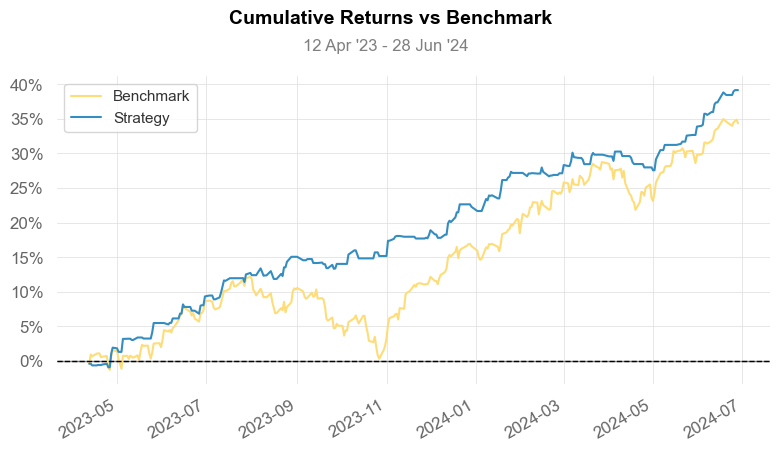

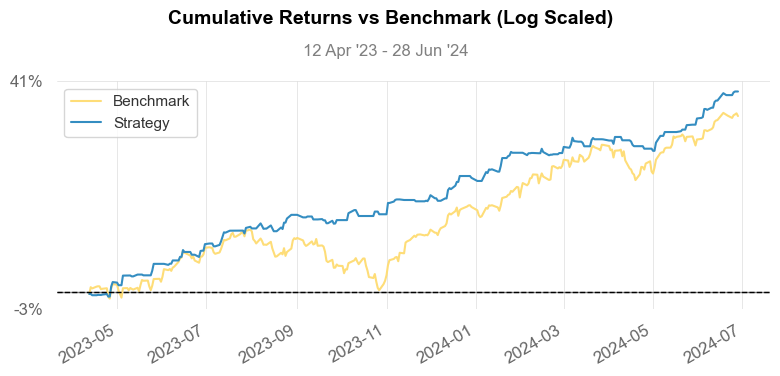

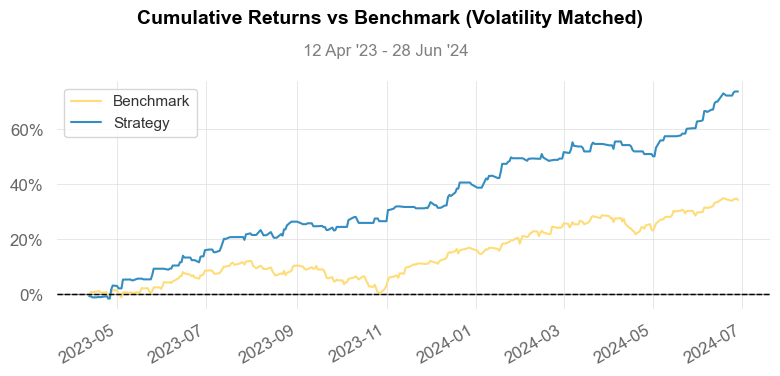

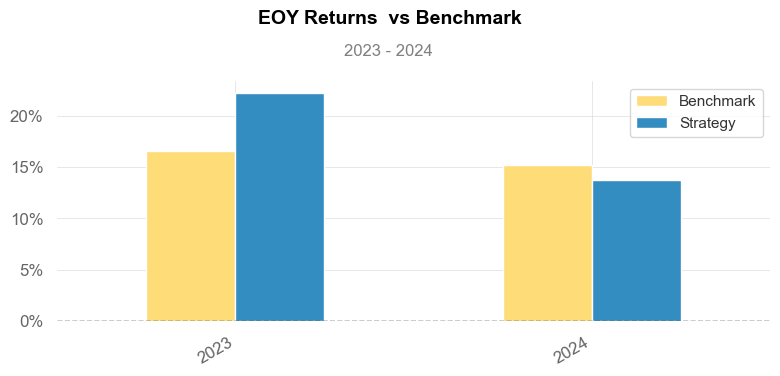

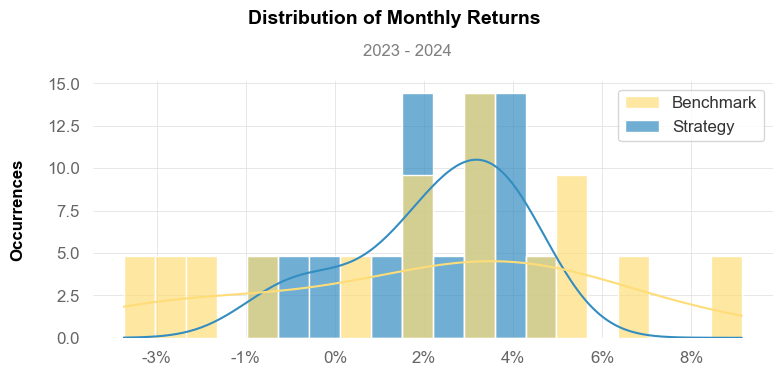

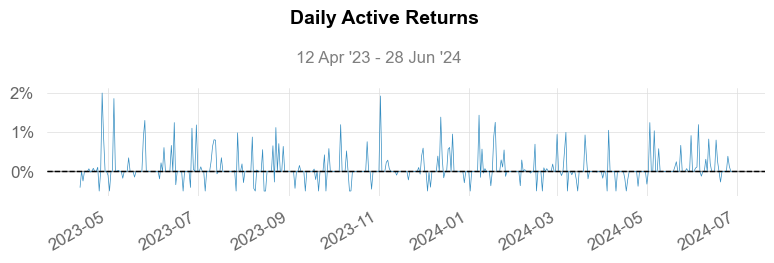

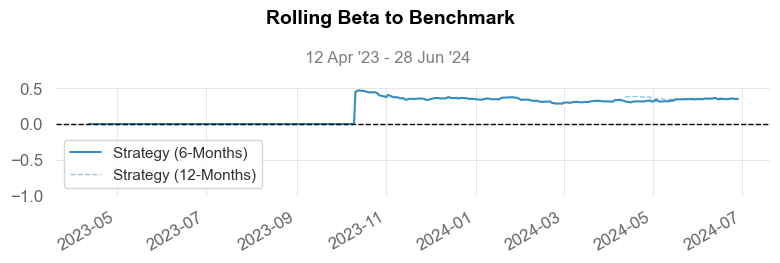

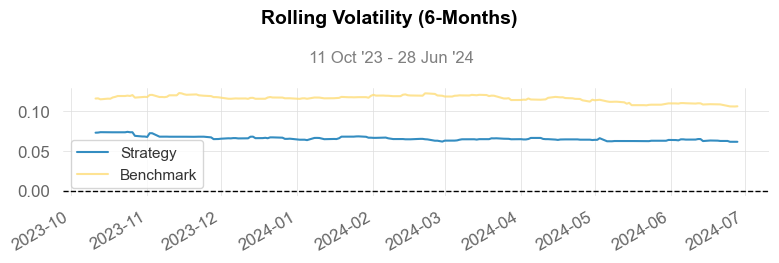

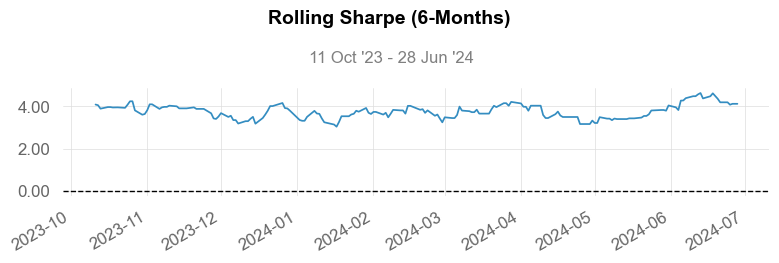

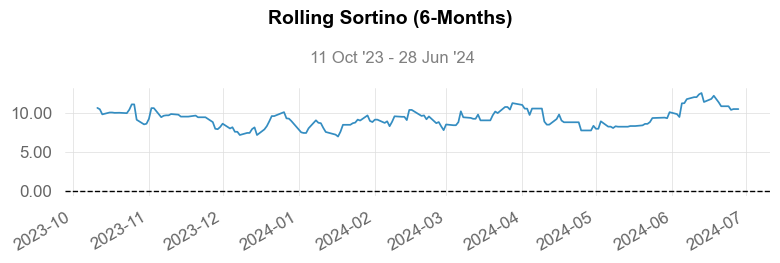

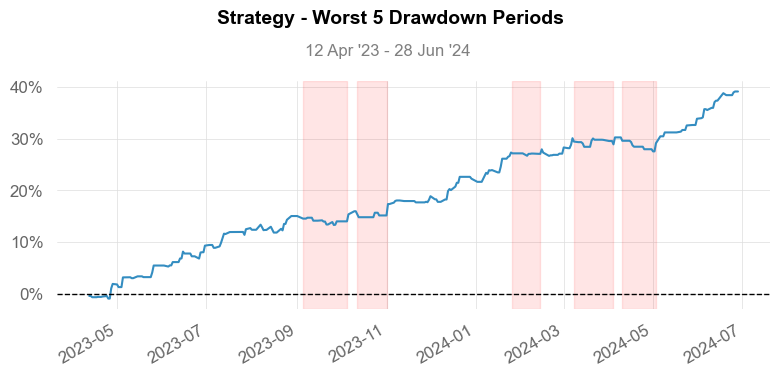

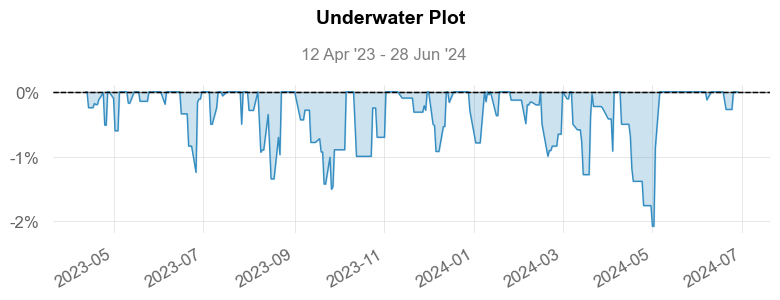

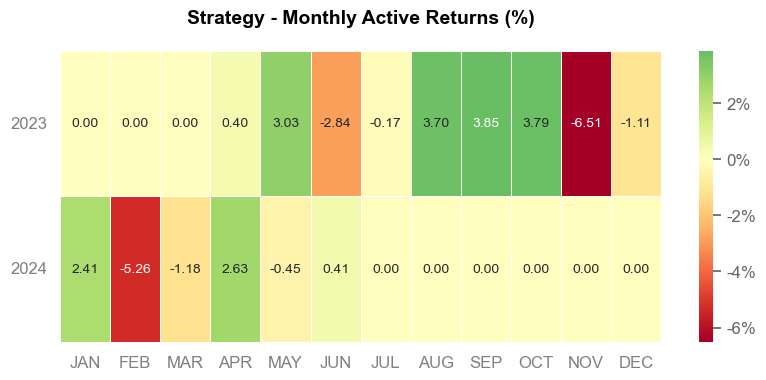

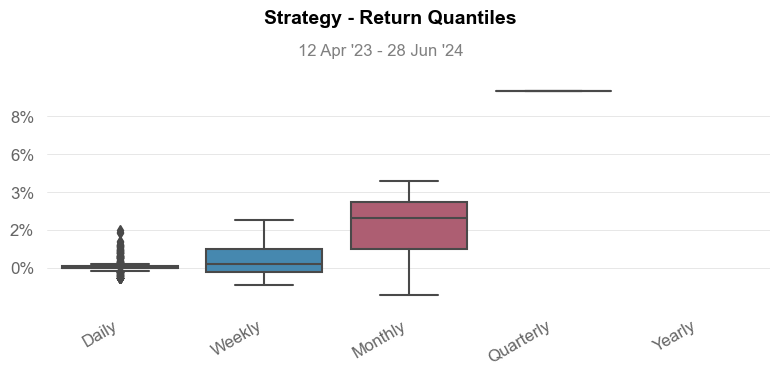

In [10]:
# Generate the full report using quantstats
qs.reports.full(LSTM_Signal_df['Strategy_Returns'], benchmark=benchmark_spy_etf_returns)

### Performance Metrics Analysis
  - The table provides a comprehensive comparison between the benchmark (SPY ETF) and our LSTM-based trading strategy. Here’s a detailed analysis of the key performance metrics:

**1. Time in Market**

   - Benchmark: 100.0%
   - Strategy: 52.0%
   - The benchmark is fully invested at all times, whereas the strategy is active only 52% of the time, indicating more selective trading and potentially reduced exposure to market risk.

**2. Cumulative Return**

   - Benchmark: 34.34%
   - Strategy: 39.13%
   - The strategy outperforms the benchmark with a higher cumulative return over the same period, demonstrating the effectiveness of the model in capturing profitable trading opportunities.

**3. Compound Annual Growth Rate (CAGR)**

   - Benchmark: 18.28%
   - Strategy: 20.67%
   - The strategy achieves a higher CAGR, reflecting consistent performance improvement compared to the benchmark.

**4. Sharpe Ratio**

   - Benchmark: 2.21
   - Strategy: 4.09
   - A significantly higher Sharpe ratio for the strategy indicates superior risk-adjusted returns, meaning the strategy delivers more return per unit of risk taken compared to the benchmark.

**5. Sortino Ratio**

   - Benchmark: 3.5
   - Strategy: 10.66
   - The strategy’s Sortino ratio is much higher, which suggests it effectively minimizes downside risk while achieving strong returns. This is crucial for strategies aimed at preserving capital.

**6. Maximum Drawdown**

   - Benchmark: -10.54%
  - Strategy: -2.08%
  - The strategy has a much lower maximum drawdown, indicating better risk management and smaller losses during market downturns.

**7. Volatility (Annualized)**

  - Benchmark: 11.34%
  - Strategy: 6.74%
  - The strategy shows lower volatility, suggesting it is less sensitive to market fluctuations and provides more stable returns compared to the benchmark.

**8. Gain/Pain Ratio**

  - Benchmark: 0.43
  - Strategy: 1.68
  - The strategy has a much higher Gain/Pain ratio, meaning it generates more gains relative to the pain (drawdowns) experienced during losing periods.

**9. Payoff Ratio**

  - Benchmark: 1.37
  - Strategy: 1.87
  - A higher payoff ratio for the strategy indicates that its average winning trades are larger than its average losing trades, contributing to overall profitability.


**10. Alpha**

  - Benchmark: -
  - Strategy: 0.18
  - The positive alpha indicates that the strategy generates excess returns above the expected benchmark return, adding value through active management.

#### Conclusion on Trading Startegy:

   - The LSTM-based trading strategy significantly outperforms the SPY ETF benchmark across various metrics, including return, risk-adjusted return, and drawdown measures. 
   - The strategy’s ability to minimize drawdowns and maintain lower volatility while delivering higher returns makes it a compelling alternative to passive investing in the benchmark. 
   - The high Sharpe and Sortino ratios, combined with strong performance in Gain/Pain and Recovery factors, highlight the strategy’s effectiveness in managing risk and generating consistent returns

---

### Conclusion of the Final Project

   - In this project, I set out to develop and evaluate a deep learning-based trading strategy focused on predicting the trend of the SPY ETF. By leveraging advanced LSTM models, combined with thorough feature engineering and robust backtesting, we aimed to construct a strategy that not only identifies profitable trading opportunities but also manages risk effectively.

 - **1. Feature Engineering and Selection:**

    - The project began with an exhaustive feature engineering process, where we extracted 355 features from various financial indicators, technical indicators, and macroeconomic data.
    - After rigorous analysis, including VIF filtering, SOM analysis, and RFE, we distilled these down to the most impactful 24 features. This selection process was crucial in ensuring that the model was trained on high-quality, relevant data, which is vital for producing accurate predictions.

  - **2. Model Development:**

    - I experimented with several deep learning models, including single-layer LSTM, multi-layer LSTM, GRU, and a hybrid LSTM-CNN model. Each model was carefully tuned using Random Search to identify the optimal hyperparameters.    - The single-layer LSTM emerged as the best performer, achieving impressive results in terms of accuracy, precision, recall, and F1 score. This model was chosen as the final model due to its ability to balance complexity with performance, making it both effective and efficient.

 - **3. Trading Strategy and Backtesting:**

   - With the best model in hand, i developed a trading strategy based on the model’s predictions. The strategy incorporated key risk management mechanisms, including stop-loss and take-profit levels, to protect against significant losses while locking in gains. 
   - The strategy was backtested over a period from April 2023 to June 2024, with the SPY ETF serving as the benchmark.

   - The backtesting results were outstanding. The strategy not only outperformed the SPY ETF in terms of cumulative return and CAGR but also exhibited superior risk-adjusted performance, as indicated by higher Sharpe and Sortino ratios. 
   - The strategy’s maximum drawdown was significantly lower than that of the benchmark, reflecting its ability to avoid severe losses during market downturns. Additionally, the strategy’s lower volatility and higher recovery factor further underscored its robustness and resilience.

 - **4. Quantitative Evaluation:**

    - QuantStats provided a detailed evaluation of the strategy’s performance, confirming its superiority across multiple dimensions. 
    - Key metrics such as the Gain/Pain ratio, Profit Factor, and Recovery Factor highlighted the strategy’s ability to generate consistent profits while effectively managing risk. The Serenity Index, in particular, demonstrated the strategy’s exceptional balance between return consistency and risk minimization.

### Learning:

  - **Importance of Robust Data Handling:**
     - The project underscored the critical importance of robust data handling practices. From cleaning and preprocessing to feature selection and engineering, every step of the data pipeline must be meticulously managed to ensure the integrity and reliability of the final model. The quality of input data has a direct impact on the performance and robustness of the model.
  - **Model Selection and Tuning:**
    - I learned the value of experimenting with different model architectures and tuning hyperparameters to find the optimal balance between complexity and generalization. While advanced models like LSTM and GRU offer significant predictive power, they must be carefully tuned to avoid overfitting and ensure that they generalize well to unseen data.
 - **The Role of Risk Management in Trading Strategies:**
    - The project highlighted the importance of incorporating robust risk management mechanisms, such as stop-loss and take-profit levels, into trading strategies. These mechanisms play a crucial role in safeguarding the portfolio from significant losses and in locking in gains, ultimately contributing to the strategy's success.
   - I also learned the importance of evaluating trading strategies not just on returns but on a comprehensive set of metrics, including risk-adjusted returns, drawdowns, and recovery factors. This holistic approach provides a more complete picture of the strategy's effectiveness and resilience.
- **Backtesting Complexity:**
   - The process of backtesting trading strategies provided valuable insights into the complexities of simulating real-world trading conditions. It reinforced the need for thorough testing and validation to ensure that the strategy is not only profitable in theory but also viable in practice.
   - The use of tools like QuantStats for performance evaluation proved to be invaluable in gaining a deeper understanding of the strategy's strengths and weaknesses. This experience emphasized the importance of continuous monitoring and adaptation in the dynamic environment of financial markets.
- **Continuous Learning and Adaptation:**
   - Financial markets are inherently unpredictable, and strategies that perform well in historical data may not always yield similar results in the future. This project reinforced the need for continuous learning and adaptation, both in terms of refining the model and in adjusting the trading strategy to evolving market conditions.


### Final Remarks:
 
 - The project successfully demonstrated the power of deep learning models in financial trend prediction and trading strategy development. By carefully selecting features, optimizing model architectures, and implementing a well-designed trading strategy, we were able to create a system that not only generates strong returns but also manages risk effectively.

 - This work highlights the potential for machine learning and AI to revolutionize financial markets, offering traders and investors tools to make more informed, data-driven decisions. While the strategy showed promising results in this backtest, it is important to recognize the need for continuous monitoring and adaptation in live trading environments. Market conditions can change rapidly, and strategies must evolve to remain effective.

 - In conclusion, this project provides a solid foundation for further exploration into AI-driven trading strategies. Future work could involve testing the strategy in different market conditions, incorporating additional asset classes, or exploring more sophisticated deep learning architectures to further enhance performance.

### References

- 1. Kannan Singaravelu, CQF: JA24P10 Trend Prediction using Logistic Regression. Certificate in Quantitative Finance (CQF) Program, 2024.

Python Libraries:
- Pandas
- NumPy
- AlphaVantage
- QuantStats

Additional References
- Wu, Jimmy Ming-Tai, et al. (2023). A Graph-based CNN-LSTM Stock Price Prediction Algorithm with Leading Indicators. Multimedia Systems, 29, 1751-1770.  
- Shen, Jingyi, & Shafiq, M. Omair. (2020). Short-term stock market price trend prediction using a comprehensive deep learning system. 
